In [3]:
#
# Author: J.G. Messchendorp, October 2020
#

%matplotlib inline
import sys
print(sys.version)
import pandas as pd   #!!!!!!!!!!!!!!!
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Update the matplotlib configuration parameters:
mpl.rcParams.update({'font.size': 18, 'font.family': 'serif', 'xtick.major.pad' : 5, 'ytick.major.pad' : 5})

3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]


In [4]:
#
# Check whether fruit file is present in this folder and print the first lines
#
!head fruit.csv

fruitid,fruitname,colorid,colorname,elongatedness,weight,sweetness,acidity
1,orange,2,brown,0.14,152,3.56,1095
1,orange,2,brown,0.09,167,3.33,1080
1,orange,2,brown,0.15,152,4,1035
1,orange,2,brown,0.03,155,3,680
1,orange,2,brown,0.08,147,2.69,1020
1,orange,2,brown,0.14,147,3.55,1045
1,orange,2,brown,0.14,152,3.33,985
1,orange,2,brown,0.18,159,2.88,1515
1,orange,3,green,0.08,152,3.17,1185


In [5]:
#
# Read the comma-seperated datafile and print first 10 entries
# "data" is of type DataFrame
#
data = pd.read_csv('fruit.csv')
print('data is of type ', type(data))
print(data.dtypes)
data.head(10)

data is of type  <class 'pandas.core.frame.DataFrame'>
fruitid            int64
fruitname         object
colorid            int64
colorname         object
elongatedness    float64
weight             int64
sweetness        float64
acidity            int64
dtype: object


,fruitid,fruitname,colorid,colorname,elongatedness,weight,sweetness,acidity
0,1,orange,2,brown,0.14,152,3.56,1095
1,1,orange,2,brown,0.09,167,3.33,1080
2,1,orange,2,brown,0.15,152,4.00,1035
3,1,orange,2,brown,0.03,155,3.00,680
4,1,orange,2,brown,0.08,147,2.69,1020
5,1,orange,2,brown,0.14,147,3.55,1045
6,1,orange,2,brown,0.14,152,3.33,985
7,1,orange,2,brown,0.18,159,2.88,1515
8,1,orange,3,green,0.08,152,3.17,1185
9,1,orange,4,orange,0.18,174,3.03,1120


In [6]:
#
# Try out sorting the data table and please note the index
#
data.sort_values(by=['sweetness', 'acidity', 'weight', 'elongatedness'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head(10)

,fruitid,fruitname,colorid,colorname,elongatedness,weight,sweetness,acidity
0,3,apple,3,green,0.30,134,1.27,720
1,3,apple,6,yellow,0.23,159,1.29,600
2,3,apple,3,green,0.28,183,1.29,630
3,3,apple,5,red,0.19,185,1.30,500
4,3,apple,5,red,0.28,120,1.33,415
5,3,apple,5,red,0.25,174,1.33,425
6,3,apple,5,red,0.25,170,1.33,550
7,3,apple,2,brown,0.30,147,1.36,560
8,3,apple,5,red,0.28,156,1.42,530
9,3,apple,6,yellow,0.30,168,1.47,480


In [7]:
#
# Extract and print some global statistics of the data
#
data[['elongatedness', 'weight', 'sweetness', 'acidity']].describe()

,elongatedness,weight,sweetness,acidity
count,179.000000,179.000000,179.000000,179.000000
mean,0.296369,144.340782,2.606034,745.849162
std,0.161922,19.280632,0.712020,314.332206
min,0.020000,105.000000,1.270000,278.000000
25%,0.150000,129.000000,1.925000,501.000000
50%,0.280000,143.000000,2.780000,672.000000
75%,0.430000,156.000000,3.170000,985.000000
max,0.690000,198.000000,4.000000,1680.000000


In [8]:
#
# How to select columns and rows according to selection rule
#
data[(data.weight > 190) & (data.elongatedness > 0.1)][['sweetness','acidity']]

,sweetness,acidity
116,3.0,1235


In [8]:
#
# More fancy things of panda libraries
#
pd.crosstab(data.fruitname, data.colorname)

colorname,blue,brown,green,orange,red,yellow
fruitname,,,,,,
apple,3,1,15,0,16,14
orange,0,8,1,37,13,0
pear,2,12,9,3,2,43


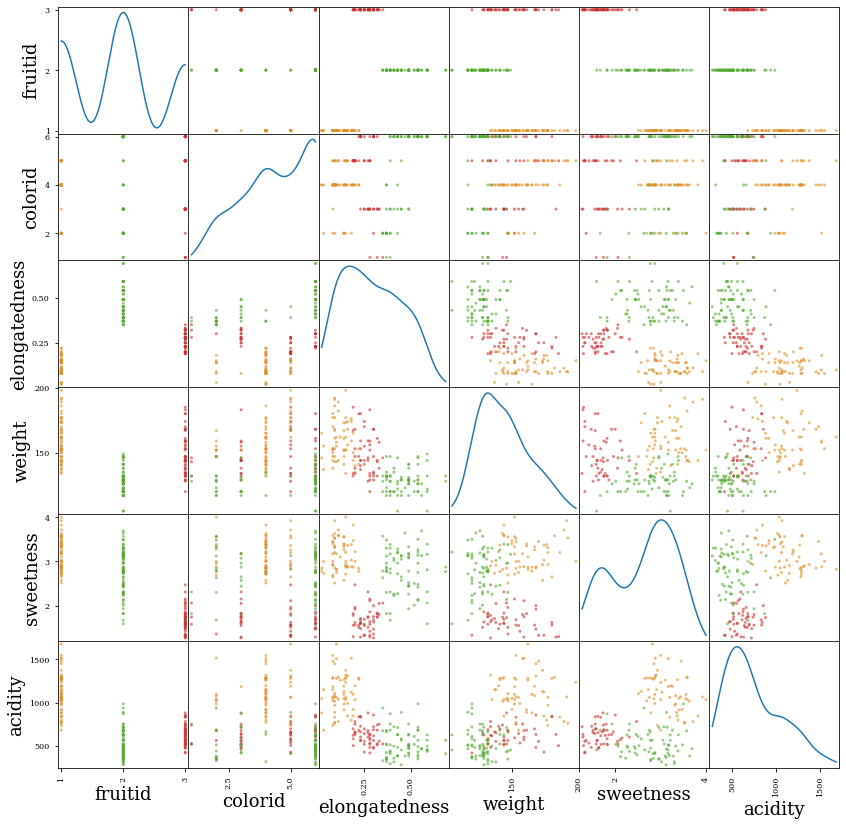

In [9]:
#
# ...and more, plotting correlations in a one liner
#
colors = ['#e09028', '#55aa33', '#cc3333']

_ = pd.plotting.scatter_matrix(data, figsize=(14,14), diagonal='kde', alpha=0.6, color=[colors[x-1] for x in list(data.fruitid)])

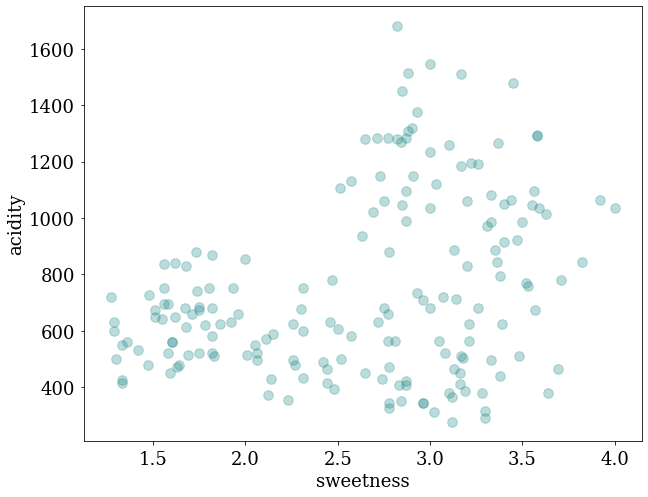

In [10]:
#
# You can also plot the results directly fromt the data table
# Lets focus on two of the variables: sweetness and acidity as example
#
_ = data.plot(kind='scatter', x='sweetness', y='acidity', color='#228888', s=92, figsize=(10,8), alpha=0.3)

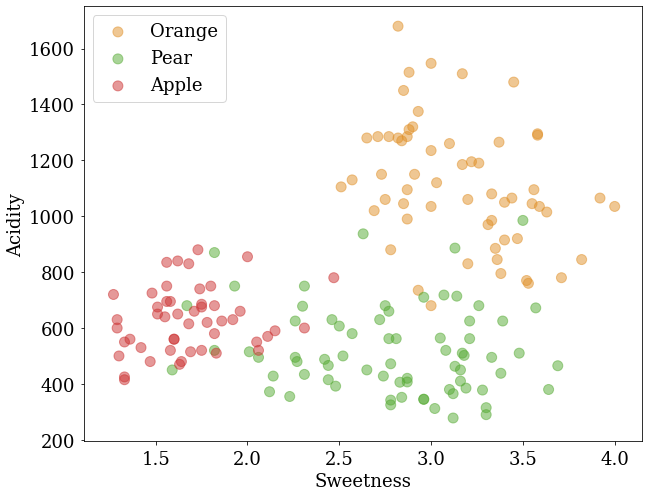

In [12]:
#
# Piece of code to use matplotlib to plot results of pandas table
# Lets seperate the three classes
#
colors     = ['#e09028', '#55aa33', '#cc3333']
fruitnames = ['Orange',  'Pear',    'Apple']

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(data[data.fruitid == i+1].sweetness, data[data.fruitid == i+1].acidity, 
                s=100, c=[colors[x-1] for x in list(data[data.fruitid == i+1].fruitid)], 
                alpha=0.5, label=fruitnames[i])
plt.xlabel('Sweetness')
plt.ylabel('Acidity')
plt.legend()
plt.show()

In [10]:
#
# Normalize the data! Necessary for any ML activity! Add two new columns to the data table.
#
data['sweetness_normal'] = (data.sweetness - data.sweetness.mean()) / data.sweetness.std()
data['acidity_normal']   = (data.acidity   - data.acidity.mean())   / data.acidity.std()

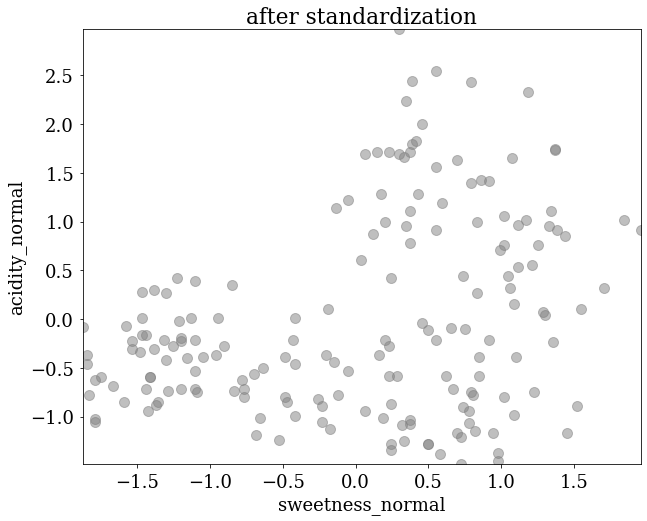

In [11]:
#
# Plot normalized results
#
plt.figure(figsize=(10, 8))
plt.scatter(data['sweetness_normal'], data['acidity_normal'], s=100, c='#808080', alpha=0.5)
plt.xlim(data['sweetness_normal'].min(), data['sweetness_normal'].max()), 
plt.ylim(data['acidity_normal'].min(), data['acidity_normal'].max())
plt.title('after standardization')
plt.xlabel('sweetness_normal')
plt.ylabel('acidity_normal')
plt.show()

In [12]:
# 
# Create numpy array containing 179 entries each with the two parameters under study
# Necessary as input to cluster algorithms
#

datasel = data[['sweetness_normal', 'acidity_normal']].values # create numpy array from a DataFrame
#datasel = np.array([list(data['sweetness_normal']), list(data['acidity_normal'])]).T # a 179 x 2 array of instances x features

#print(datasel)

In [26]:
#
# Lets start with KMeans exercise with k=3
#

from sklearn import cluster # The magic box!!!

start = np.array([[-2, 3], [0, 1], [0, 1]])

k = 3 #number of clusters
#kmeans = cluster.KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=1)
kmeans = cluster.KMeans(n_clusters=k, max_iter=1000, init=start, n_init=1)
kmeans.fit(datasel)

#
# The output of the "fit" are arrays of list of labels matching input data set,
# the found centroids, and other useful parameters such as number of iterations it took.
#
labels    = kmeans.labels_
centroids = kmeans.cluster_centers_
nriter    = kmeans.n_iter_

In [27]:
#
# Print the output parameters of the cluster "fit"
#
print("labels:    ", labels)
print("centroids: ", centroids)
print("nriters:   ", nriter)

labels:     [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1]
centroids:  [[ 0.58890389 -0.74373606]
 [ 0.74140488  1.2695535 ]
 [-1.16423229 -0.43012776]]
nriters:    11


In [15]:
#
# Plot function of labeled data and centroids
# I defined a function, since I want to use it later for another cluster algorithm
#
def plot_clusters(data, centroids, labels):
    plt.figure(figsize=(10, 8))
    for i in range(len(centroids)):
        subset = data[np.where(labels==i)]
        plt.plot(subset[:,0],subset[:,1],'o')
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        plt.setp(lines,ms=15.0, mew=3.0)
    plt.xlabel('sweetness_normal')
    plt.ylabel('acidity_normal')  
    plt.show()

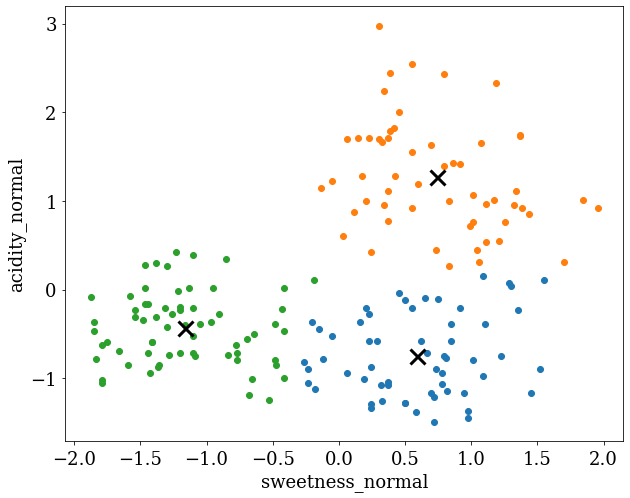

In [28]:
#
# Plot it now...
#
plot_clusters(datasel, centroids, labels)

In [39]:
#
# Lets play with MeansShift algorithm as another example
# Note that the logic to set it up looks very similar to KMeans
#
meanshift = cluster.MeanShift(bandwidth=2)
meanshift.fit(datasel)

labels    = meanshift.labels_
centroids = meanshift.cluster_centers_
nriter    = meanshift.n_iter_

In [35]:
#print("labels:    ", labels)
print("centroids: ", centroids)
print("nriters:   ", nriter)

centroids:  [[-1.12253714 -0.44982117]
 [ 0.20889262 -0.75765973]
 [ 0.85601311  0.15359068]
 [ 0.6904667   1.14617112]]
nriters:    12


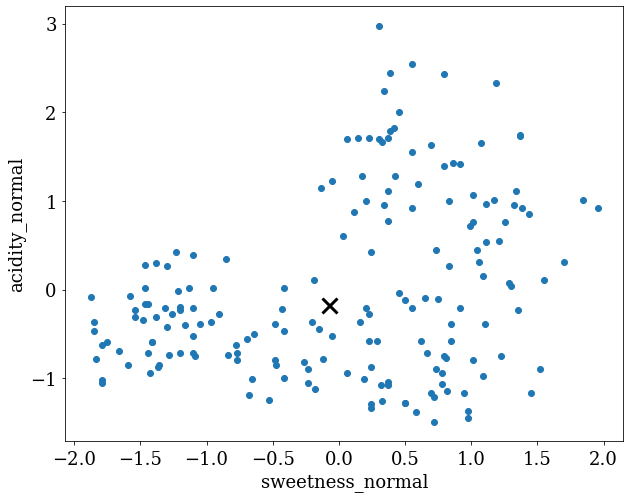

In [40]:
#
# Lets plot the outcome of MeanShift
# Note that I use the same plot function earlier defined
#
plot_clusters(datasel, centroids, labels)

In [31]:
#
# How to find the optimum value for "k" and "bandwidth"?
# One may use some of the metrics part of the sklearn library
# One of them is the so-called silhouette_score which can be used to find the optimum
#

from sklearn.metrics import silhouette_score

#
# Lets define two functions that return the silhouette score for KMeans and MeanShift
# 

def kmeans_silhouette(k):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=1)
    kmeans.fit(datasel)
    
    score = silhouette_score(datasel, kmeans.labels_)
    return score

def meanshift_silhouette(bw):
    meanshift = cluster.MeanShift(bandwidth=bw)
    meanshift.fit(datasel)
    
    score = silhouette_score(datasel, meanshift.labels_)
    return score

(1, 10)

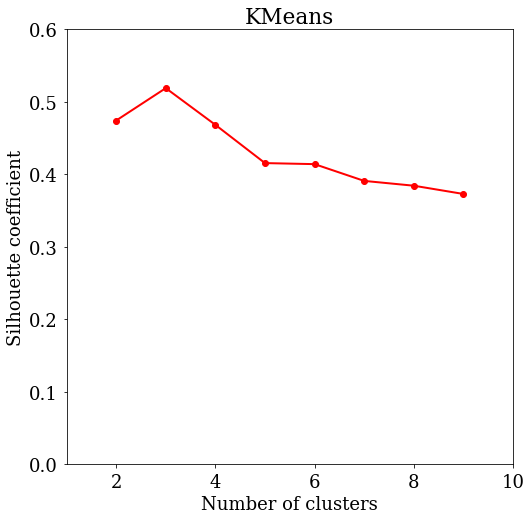

In [32]:
#
# Plot the silhouette score as a function of "k" (KMeans)
# Note that the best "k" value corresponds when silhouette is maximal
#

klist = np.arange(2,10,1)

silhouettes = []
for k in klist:
    silhouettes.append(kmeans_silhouette(k))

plt.figure(figsize=(8, 8))
plt.plot(klist, silhouettes, 'ro-', lw=2)
plt.title('KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.ylim(0, 0.6)
plt.xlim(1,10)

(0, 0.6)

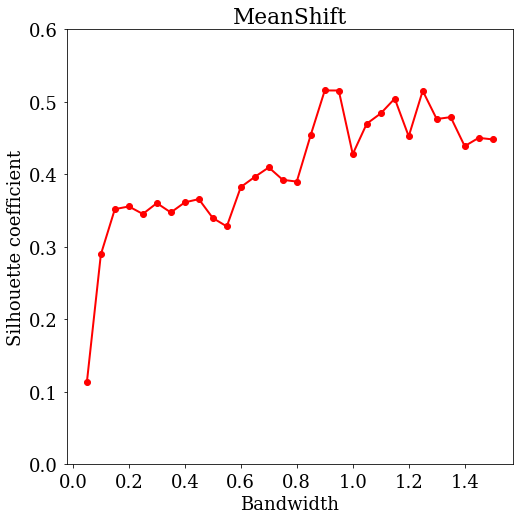

In [33]:
#
# Plot the silhouette score as a function of "bandwidth" (MeanShift)
# Note that the best bandwidth value corresponds when silhouette is maximal
#

bandwidthlist = np.arange(0.05,1.55,0.05) 

silhouettes = []  
for bw in bandwidthlist:
    silhouettes.append(meanshift_silhouette(bw))

plt.figure(figsize=(8, 8))
plt.plot(bandwidthlist, silhouettes, 'ro-', lw=2)
plt.title('MeanShift')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette coefficient')
plt.ylim(0, 0.6)

### Homework tasks:

   - Since we do have the true labels of each instance, setup a performance metric that returns the number of false labels (error rate) for each clustering algorithm.
   - Play with the clustering algorithms using higher dimensions, and verify that the error rate reduces.
   - Study other clustering methods than KMeans and MeanShift and compare pros and cons.